<a href="https://colab.research.google.com/github/PedroHSS01/Challenge-Alura-TelecomX_BR/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extração dos Dados

In [1]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
df = pd.DataFrame(requests.get(url).json())

df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# visualização e tratamento

In [2]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [3]:
# Desaninhar colunas
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

# Juntar no DataFrame original
df = pd.concat([
    df[['customerID', 'Churn']],
    df_customer,
    df_phone,
    df_internet,
    df_account
], axis=1)

In [4]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [6]:
# Verifica strings vazias ou espaços em branco
empty_strings = df.apply(lambda x: x.astype(str).str.strip() == '').sum()

# Filtra colunas com pelo menos 1 ocorrência e mostra o total
empty_strings = empty_strings[empty_strings > 0]
print(f"Strings vazias/em branco por coluna:\n{empty_strings}\nTotal: {empty_strings.sum()}")

Strings vazias/em branco por coluna:
Churn            224
Charges.Total     11
dtype: int64
Total: 235


Foi identificado 235 strings vazias ou em branco. Esses mesmo 235 representão aproximadamente 3% do df por conta disso é aceitavel a eliminação dessas linhas acreditando que não deve comprometer a capacidade do seu modelo.

In [7]:
# Tratando strings vazias para NaN para garantir que sejam tratadas como ausentes
df['Churn'] = df['Churn'].replace(r'^\s*$', np.nan, regex=True)
df['Charges.Total'] = df['Charges.Total'].replace(r'^\s*$', np.nan, regex=True)

# Remove as linhas Churn e Charges.Total q contêm NaN
df.dropna(subset=['Churn', 'Charges.Total'], inplace=True)
print(f"Número de linhas após a remoção: {len(df)}")

Número de linhas após a remoção: 7032


# Coluna de Contas Diárias

In [8]:
df['Contas.Diarias'] = df['Charges.Monthly'] / 30
df[['Charges.Monthly', 'Contas.Diarias']].head()

,Charges.Monthly,Contas.Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


# Padronização

In [9]:
standard = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling',]
df[standard] = df[standard].replace({'Yes': 1, 'No': 0})

/tmp/ipython-input-4208053516.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[standard] = df[standard].replace({'Yes': 1, 'No': 0})


In [10]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas.Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.4,2.796667


# Análise Descritiva

In [11]:
df.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Contas.Diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.903299,0.592719,64.798208,2.159940
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.295571,0.491363,30.085974,1.002866
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,1.186250
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.862500,2.995417
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,3.958333


### Principais Conclusões da Análise

1. **Churn (Rotatividade)**:
   - Quase **27%** dos clientes cancelaram o serviço .
   - Mediana = 0: maioria não cancelou, mas a distribuição é assimétrica (problema para retenção).

2. **Meses de contrato do cliente (Tenure)**:
   - Média é de quase 3 anos **32,42 meses**, mas com alta variabilidade (**DP = 24,55**).
   - Clientes variam de **1 mês** à a **72 meses** (clientes fiéis).

3. **Perfil Demográfico**:
   - **16,24%** são idosos (`SeniorCitizen` = 1).
   - **48,25%** têm parceiro (`Partner`), e **29,85%** têm dependentes (`Dependents`).

4. **Serviços e Cobrança**:
   - **90,33%** possuem `PhoneService`.
   - **59,27%** optram por `PaperlessBilling` (Receber online a fatura).
   - Cobrança mensal (`Charges_Monthly`):
     - Média = **R$ 64,80**, mas mediana = **R$ 70,35**.

In [12]:
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
print(f"Gasto total médio: {df['Charges.Total'].mean():.2f}")

Gasto total médio: 2283.30


# Análise de  Evasão

In [13]:
Churn = df['Churn'].value_counts()
Churn = Churn.filter([0,1])
Churn ={0: Churn[0], 1: Churn[1]}

df['Client_status']= df['Churn'].map({0: 'Ativo', 1: 'Cancelado'})

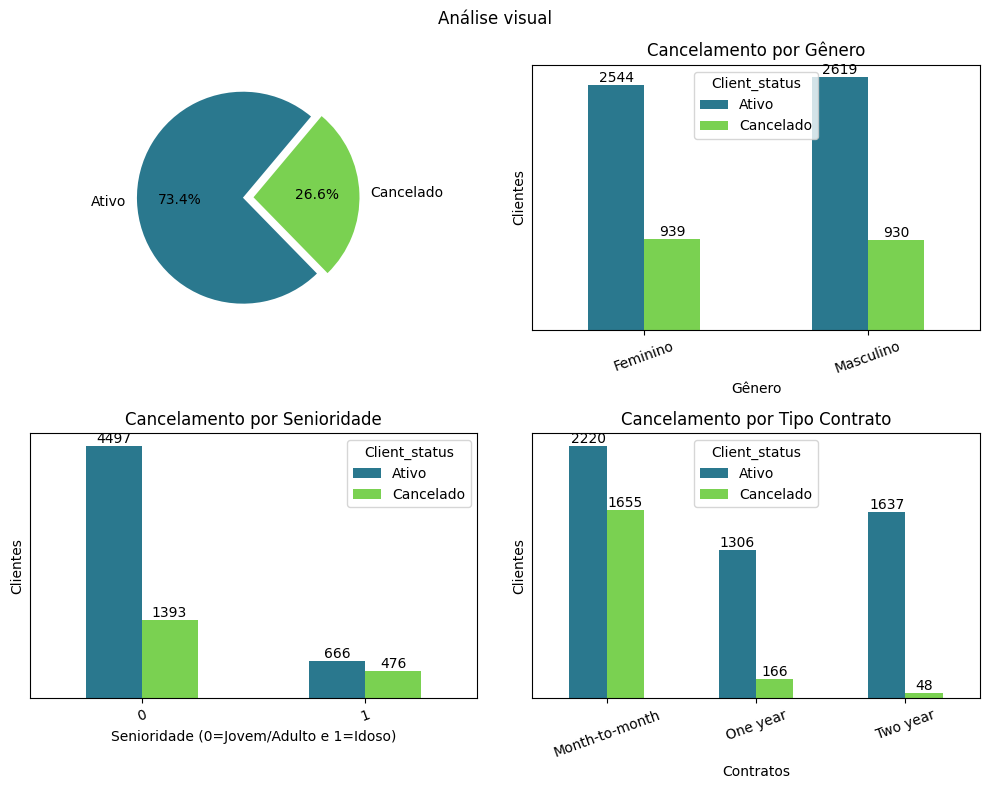

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Análise visual')

# Função gráfico de pizza
def plot_pie(ax, data, labels, colors, explode=None, startangle=50, autopct='%1.1f%%'):
    ax.pie(data, labels=labels, colors=colors, explode=explode, startangle=startangle, autopct=autopct)

# Função gráficos de barras
def plot_bar(ax, df, group_col, status_col, colors, title, xlabel, ylabel='Clientes', rotation=20):
    df.groupby([group_col, status_col]).size().unstack().plot.bar(ax=ax, color=colors)
    for p in ax.patches:
        ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.tick_params(axis='x', rotation=rotation)
    ax.set_yticks([])

colors = plt.cm.viridis(np.linspace(0.4, 0.8, 2))
plot_pie(axes[0, 0], [Churn[0], Churn[1]], ['Ativo', 'Cancelado'], colors, explode=[0.1, 0])
plot_bar(axes[0, 1], df, 'gender', 'Client_status', colors, 'Cancelamento por Gênero', 'Gênero')
axes[0, 1].set_xticklabels(['Feminino', 'Masculino'])

plot_bar(axes[1, 0], df, 'SeniorCitizen', 'Client_status', colors,
         'Cancelamento por Senioridade', 'Senioridade (0=Jovem/Adulto e 1=Idoso)')

plot_bar(axes[1, 1], df, 'Contract', 'Client_status', colors,
         'Cancelamento por Tipo Contrato', 'Contratos')

plt.tight_layout()

# Evasões Categóricas

In [15]:
alt_names = {
    'gender': 'Gênero',
    'Contract': 'Tipo de Contrato',
    'PaymentMethod': 'Forma de Pagamento',
    'InternetService': 'Serviço de Internet',
    'StreamingTV': 'Streaming de TV',
    'MultipleLines': 'Linhas Telefônicas',
    'Churn': 'Evasão',
    'SeniorCitizen': 'Idoso (65+ anos)',
    'Partner': 'Possui Parceiro(a)',
    'Dependents': 'Possui Dependentes',
    'PaperlessBilling': 'Fatura Digital',
    'OnlineSecurity': 'Segurança Online',
    'DeviceProtection': 'Proteção do Dispositivo'
}

In [16]:
def plot_churn_plotly(col):
    dados_plot = df.copy()
    dados_plot['Churn'] = dados_plot['Churn'].replace({0: 'Permaneceu', 1: 'Saiu'})

    fig = px.histogram(
        dados_plot,
        x=col,
        color='Churn',
        barmode='group',
        text_auto=True,
        color_discrete_map={'Permaneceu': '#66c2a5', 'Saiu': '#fc8d62'},
        labels={
            col: alt_names.get(col, col).title(),
            'Churn': 'Status do Cliente'
        }
    )

    fig.update_layout(

        title=f'Evasão por {alt_names.get(col, col).title()}',
        xaxis_title=alt_names.get(col, col).title(),
        yaxis_title='Quantidade de Clientes',
        legend_title='Status',
        bargap=0.2
    )

    fig.show()

In [17]:
def plot_churn_percent_plotly(col):
    df_plot = df.copy()
    proporcao = (
        df_plot.groupby(col)['Churn']
        .mean()
        .reset_index()
        .sort_values('Churn', ascending=True)
    )
    proporcao['Churn'] *= 100

    # Gráfico horizontal
    fig = px.bar(
        proporcao,
        x='Churn',
        y=col,
        orientation='h',
        text='Churn',
        labels={
            col: alt_names.get(col, col).title(),
            'Churn': 'Evasão (%)'
        },
        color='Churn',
        color_continuous_scale='Reds'
    )

    fig.update_layout(

        title=f'Proporção de Evasão por {alt_names.get(col, col).title()}',
        xaxis_title='Evasão (%)',
        yaxis_title=alt_names.get(col, col).title(),
        coloraxis_showscale=False
    )

    fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
    fig.show()

In [18]:
plot_churn_percent_plotly('Contract')
plot_churn_plotly('Contract')

plot_churn_percent_plotly('MultipleLines')
plot_churn_plotly('MultipleLines')

plot_churn_plotly('PaymentMethod')
plot_churn_percent_plotly('PaymentMethod')

plot_churn_plotly('StreamingTV')
plot_churn_percent_plotly('StreamingTV')

plot_churn_plotly('InternetService')
plot_churn_percent_plotly('InternetService')

plot_churn_plotly('SeniorCitizen')
plot_churn_percent_plotly('SeniorCitizen')

plot_churn_plotly('Partner')
plot_churn_percent_plotly('Partner')

plot_churn_plotly('Dependents')
plot_churn_percent_plotly('Dependents')

plot_churn_plotly('PaperlessBilling')
plot_churn_percent_plotly('PaperlessBilling')

plot_churn_plotly('OnlineSecurity')
plot_churn_percent_plotly('OnlineSecurity')

plot_churn_plotly('DeviceProtection')
plot_churn_percent_plotly('DeviceProtection')

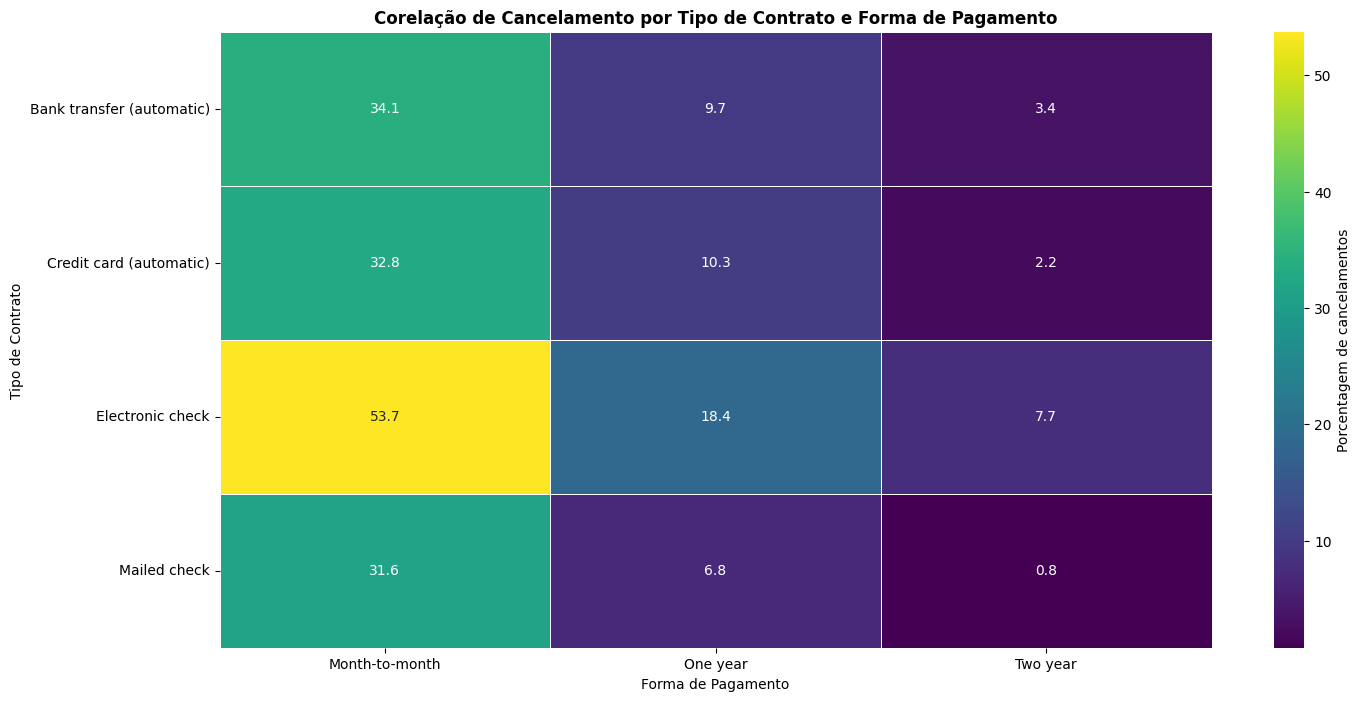

In [19]:
df['Churn'] = df['Churn'].replace({'': np.nan, 'Yes': 1, 'No': 0})
df.dropna(subset=['Churn'], inplace=True)
df['Churn'] = df['Churn'].astype(int)

sns.set_palette('viridis')
fig, ax = plt.subplots(1, 1, figsize=(16, 8))


risk_correlation = df.groupby(['PaymentMethod', 'Contract'])['Churn'].mean() * 100
risk_unstack = risk_correlation.unstack()
sns.heatmap(risk_unstack, annot=True, cmap='viridis', fmt='.1f', ax= ax, linewidths=0.5 ,cbar_kws= {'label':"Porcentagem de cancelamentos"})
ax.set_title('Corelação de Cancelamento por Tipo de Contrato e Forma de Pagamento', fontweight='bold')
ax.set_xlabel('Forma de Pagamento')
ax.set_ylabel('Tipo de Contrato')
plt.show()

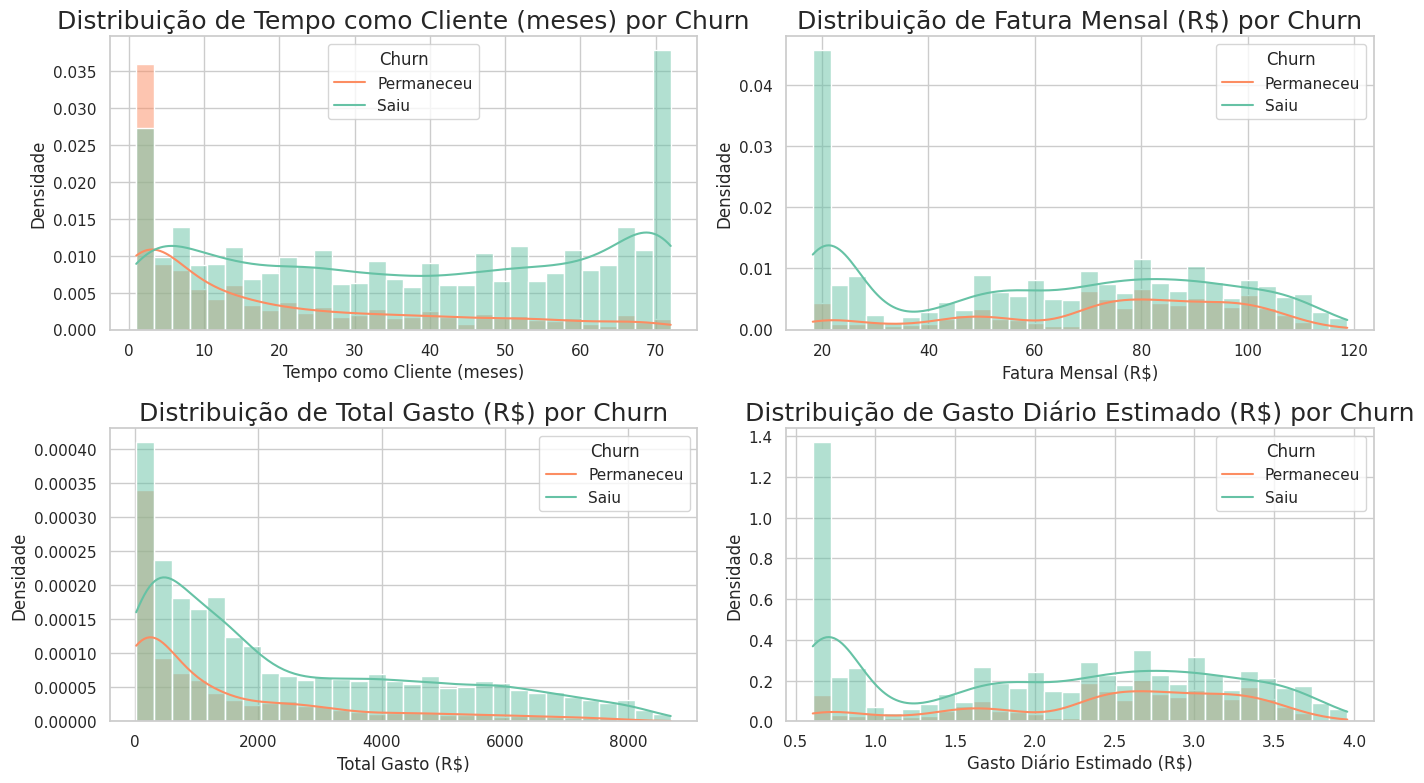

In [20]:
# Configurações iniciais
sns.set(style="whitegrid")
variaveis = {
    'tenure': 'Tempo como Cliente (meses)',
    'Charges.Monthly': 'Fatura Mensal (R$)',
    'Charges.Total': 'Total Gasto (R$)',
    'Contas.Diarias': 'Gasto Diário Estimado (R$)'
}

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()

# Loop
for ax, (col, titulo) in zip(axes, variaveis.items()):
    sns.histplot(
        data=df,
        x=col,
        hue='Churn',
        kde=True,
        palette='Set2',
        bins=30,
        stat='density',
        ax=ax
    )
    ax.set_title(f'Distribuição de {titulo} por Churn', fontsize=18)
    ax.set_xlabel(titulo)
    ax.set_ylabel('Densidade')
    ax.legend(title='Churn', labels=['Permaneceu', 'Saiu'])

plt.tight_layout()
plt.show()

In [21]:
df.to_csv("dados_trabalhado.csv", index=False)

In [22]:
print("\n" + "="*80)
print("📊 RELATÓRIO DE ANÁLISE DE CHURN (CANCELAMENTO)")
print("="*80)

# Dados básicos
total_clientes = len(df)
clientes_cancelados = df['Churn'].sum()
taxa_churn = (clientes_cancelados / total_clientes) * 100

# Principais insights
print(f"\n🔍 PRINCIPAIS INSIGHTS:")
print(f"• Taxa Geral de Cancelamento: {taxa_churn:.1f}%")
print(f"• Contratos Mensais têm maior risco: {df[df['Contract'] == 'Month-to-month']['Churn'].mean()*100:.1f}% de churn")
print(f"• Clientes novos (até 12 meses): {df[df['tenure'] <= 12]['Churn'].mean()*100:.1f}% de cancelamento")
print(f"• Diferença de valor médio: Cancelados pagam R${df[df['Churn']==1]['Charges.Monthly'].mean():.2f} vs R${df[df['Churn']==0]['Charges.Monthly'].mean():.2f}")

print("\n📌 ANÁLISE DETALHADA POR CATEGORIA")
print(f"• Forma de Pagamento: Eletrônicos ({df[df['PaymentMethod'].str.contains('Electronic')]['Churn'].mean()*100:.1f}% churn)")
print(f"• Serviço de Internet: Fibra Ótica ({df[df['InternetService'] == 'Fiber optic']['Churn'].mean()*100:.1f}% churn)")
print(f"• Sem Segurança Online: {df[df['OnlineSecurity'] == 'No']['Churn'].mean()*100:.1f}% vs Com Segurança: {df[df['OnlineSecurity'] == 'Yes']['Churn'].mean()*100:.1f}%")

# Configuração das análises para cada tipo de variável
analises = {
    # Colunas binárias (Yes/No)
    'binarias': {
        'cols': ['Partner', 'Dependents', 'OnlineSecurity',
                'DeviceProtection', 'StreamingTV', 'MultipleLines'],
        'template': "• {}: {:.1f}% (Não) vs {:.1f}% (Sim)"
    },

    # Colunas com múltiplas categorias
    'categoricas': {
        'cols': ['gender', 'Contract', 'PaymentMethod', 'InternetService'],
        'template': "• {}:"
    },

    # Variável especial (SeniorCitizen)
    'especial': {
        'cols': ['SeniorCitizen'],
        'template': "• {}: {:.1f}% (Jovem/Adulto) vs {:.1f}% (Idoso)"
    }
}

# Pré-processamento: limpeza de dados
for col in analises['binarias']['cols']:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})

# Análise para cada grupo
for tipo, config in analises.items():
    for col in config['cols']:
        try:
            label = alt_names.get(col, col)

            if tipo == 'binarias':
                nao = df[df[col] == 'No']['Churn'].mean() * 100
                sim = df[df[col] == 'Yes']['Churn'].mean() * 100
                if not np.isnan(nao) and not np.isnan(sim):
                    print(config['template'].format(label, nao, sim))

            elif tipo == 'categoricas':
                print(f"\n{label}:")
                for valor in df[col].unique():
                    taxa = df[df[col] == valor]['Churn'].mean() * 100
                    print(f"  ▸ {valor}: {taxa:.1f}%")

            elif tipo == 'especial':
                jovem = df[df[col] == 0]['Churn'].mean() * 100
                idoso = df[df[col] == 1]['Churn'].mean() * 100
                print(config['template'].format(label, jovem, idoso))

        except Exception as e:
            continue


# Oportunidades
print(f"\n💡 OPORTUNIDADES DE MELHORIA:")
print(f"• {len(df[(df['Contract'] == 'Month-to-month') & (df['InternetService'] == 'Fiber optic')]):,} clientes em alto risco (Fibra + Mensal)")
print(f"• Potencial de retenção: Oferecer contratos anuais poderia reduzir churn em {(df[df['Contract'] == 'Month-to-month']['Churn'].mean() - df[df['Contract'] == 'Two year']['Churn'].mean())*100:.1f}%")
print(f"• Meta realista: Reduzir churn para 20% = evitar {int((taxa_churn - 20)/100 * total_clientes):,} cancelamentos")

print("\n" + "="*80)
print("📈 PRÓXIMOS PASSOS RECOMENDADOS:")
print("1. Criar programa de fidelização para contratos mensais")
print("2. Oferecer promoções para migração para contratos anuais")
print("3. Pacote combinado de segurança online + streaming")
print("4. Campanhas direcionadas para clientes com 3-6 meses de tenure")
print("="*80)


📊 RELATÓRIO DE ANÁLISE DE CHURN (CANCELAMENTO)

🔍 PRINCIPAIS INSIGHTS:
• Taxa Geral de Cancelamento: 26.6%
• Contratos Mensais têm maior risco: 42.7% de churn
• Clientes novos (até 12 meses): 47.7% de cancelamento
• Diferença de valor médio: Cancelados pagam R$74.44 vs R$61.31

📌 ANÁLISE DETALHADA POR CATEGORIA
• Forma de Pagamento: Eletrônicos (45.3% churn)
• Serviço de Internet: Fibra Ótica (41.9% churn)
• Sem Segurança Online: 41.8% vs Com Segurança: 14.6%
• Segurança Online: 31.4% (Não) vs 14.6% (Sim)

Gênero:
  ▸ Female: 27.0%
  ▸ Male: 26.2%

Tipo de Contrato:
  ▸ One year: 11.3%
  ▸ Month-to-month: 42.7%
  ▸ Two year: 2.8%

Forma de Pagamento:
  ▸ Mailed check: 19.2%
  ▸ Electronic check: 45.3%
  ▸ Credit card (automatic): 15.3%
  ▸ Bank transfer (automatic): 16.7%

Serviço de Internet:
  ▸ DSL: 19.0%
  ▸ Fiber optic: 41.9%
  ▸ No: 7.4%
• Idoso (65+ anos): 23.7% (Jovem/Adulto) vs 41.7% (Idoso)

💡 OPORTUNIDADES DE MELHORIA:
• 2,128 clientes em alto risco (Fibra + Mensal)
• Poten